# ML Project : Predicting Movie Revenue
Made by:

Corentin Maillard 21306

Mourad Mettioui 195019

## A) Data Understanding and analysis

### 1) Load the Dataset and libraries

In [152]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_file_path = 'dataset.csv'
dataset_supplement_file_path = 'dataset_supplement.csv'
# transform the first collum into an index
dataset_data = pd.read_csv(dataset_file_path, index_col=0)
dataset_supplement_data = pd.read_csv(dataset_supplement_file_path, index_col=0)

dataset_supplement_data.drop(columns=['title'], inplace=True)
left = dataset_data.set_index(['id'])
right = dataset_supplement_data.set_index(['movie_id'])
data_combind = left.join(right)
# data_combind.set_index(['id'])
data_combind = data_combind.sort_values(by = 'id')


### 2) Undersand the structure of the dataset

In [182]:
# examine the contents of the resultant Dataset using the head() command, which grabs the first five rows:
data_combind

,vote_count,vote_average,title,tagline,status,spoken_languages,duration,revenue,release,countries_of_production,...,popularity,overview,original_title,original_language,keywords,homepage,genres,financial_investment,actors,production_crew
id,,,,,,,,,,,,,,,,,,,,,
5,530,6.5,Four Rooms,Twelve outrageous guests. Four scandalous requ...,Released,en,98.0,4300000.0,1995-12-09,US,...,22.876230,It's Ted the Bellhop's first night on the job....,Four Rooms,en,"hotel,new year's eve,witch,bet,hotel room,sper...",NaN,"Crime,Comedy",4000000.0,"Tim Roth,Antonio Banderas,Jennifer Beals,Madon...","Allison Anders,Allison Anders,Alexandre Rockwe..."
11,6624,NaN,Star Wars,"A long time ago in a galaxy far, far away...",Released,en,121.0,775398007.0,1977-05-25,US,...,126.393695,Princess Leia is captured and held hostage by ...,Star Wars,en,"android,galaxy,hermit,death star,lightsaber,je...",http://www.starwars.com/films/star-wars-episod...,"Adventure,Action,Science Fiction",11000000.0,"Mark Hamill,Harrison Ford,Carrie Fisher,Peter ...","George Lucas,George Lucas,George Lucas,Gary Ku..."
12,6122,7.6,Finding Nemo,"There are 3.7 trillion fish in the ocean, they...",Released,en,100.0,940335536.0,2003-05-30,US,...,85.688789,"Nemo, an adventurous young clownfish, is unexp...",Finding Nemo,en,"father son relationship,harbor,underwater,fish...",http://movies.disney.com/finding-nemo,"Animation,Family",94000000.0,"Albert Brooks,Ellen DeGeneres,Alexander Gould,...","Andrew Stanton,Andrew Stanton,Andrew Stanton,L..."
13,7927,8.2,Forrest Gump,"The world will never be the same, once you've ...",Released,en,142.0,677945399.0,1994-07-06,US,...,138.133331,A man with a low IQ has accomplished great thi...,Forrest Gump,en,"vietnam veteran,hippie,mentally disabled,runni...",NaN,"Comedy,Drama,Romance",55000000.0,"Tom Hanks,Robin Wright,Gary Sinise,Mykelti Wil...","Alan Silvestri,Robert Zemeckis,Winston Groom,E..."
14,3313,7.9,American Beauty,Look closer.,Released,en,122.0,356296601.0,1999-09-15,US,...,80.878605,"Lester Burnham, a depressed suburban father in...",American Beauty,en,"male nudity,female nudity,adultery,midlife cri...",http://www.dreamworks.com/ab/,Drama,15000000.0,"Kevin Spacey,Annette Bening,Thora Birch,Wes Be...","Thomas Newman,Sam Mendes,Alan Ball,Alan Ball,A..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426067,0,0.0,Midnight Cabaret,The hot spot where Satan's waitin'.,Released,en,94.0,0.0,1990-01-01,,...,0.001389,A Broadway producer puts on a play with a Devi...,Midnight Cabaret,NaN,,NaN,Horror,0.0,"Lisa Hart Carroll,Michael Des Barres,Paul Drak...",Pece Dingo
426469,7,7.4,Growing Up Smith,It’s better to stand out than to fit in.,Released,en,102.0,0.0,2017-02-03,,...,0.710870,"In 1979, an Indian family moves to America wit...",Growing Up Smith,en,,http://www.growingupsmithmovie.com,"Comedy,Family,Drama",0.0,"Roni Akurati,Brighton Sharbino,Jason Lee,Anjul...","Frank Lotito,Gregory Scott Houghton,Josh Rathmell"
433715,0,NaN,8 Days,She never knew it could happen to her...,Released,en,90.0,0.0,2014-06-15,US,...,0.015295,"After sneaking to a party with her friends, 16...",8 Days,en,"christian film,sex trafficking",NaN,"Thriller,Drama",0.0,"Nicole Smolen,Kim Baldwin,Ariana Stephens,Brys...","Jaco Booyens,Philipa A. Booyens,Ferdinand Gern..."


We can see the different features which are:
- vote count
- vote average
- title
- tagline
- status
- spoken languages
- duration
- release
- countries_of_production
- production
- popularity
- overview
- original_title
- original_language
- keywords
- id
- homepage
- genres
- financial_investment
- actors
- production_crew

And we have the target : 
- revenue

In [123]:
# we are going to see if all the data that we have are complete
data_combind.info()
# we can also use the isnull().sum() to see directly how many data are missing
data_combind.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 5 to 459488
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote_count               4803 non-null   int64  
 1   vote_average             4323 non-null   float64
 2   title                    4803 non-null   object 
 3   tagline                  3959 non-null   object 
 4   status                   4803 non-null   object 
 5   spoken_languages         4803 non-null   object 
 6   duration                 4801 non-null   float64
 7   revenue                  4755 non-null   float64
 8   release                  4802 non-null   object 
 9   countries_of_production  4803 non-null   object 
 10  production               4803 non-null   object 
 11  popularity               4803 non-null   float64
 12  overview                 4800 non-null   object 
 13  original_title           4803 non-null   object 
 14  original_language        45

vote_count                    0
vote_average                480
title                         0
tagline                     844
status                        0
spoken_languages              0
duration                      2
revenue                      48
release                       1
countries_of_production       0
production                    0
popularity                    0
overview                      3
original_title                0
original_language           240
keywords                      0
homepage                   3091
genres                        0
financial_investment        384
actors                        0
production_crew               0
dtype: int64

We can see that they are only 1712 non-null homepage on 4803 entires, so we will discard this feature because they are too many missing datas.

For the other features, we can see if they are complete or not

In [139]:
# we are going to see if all the data are different or not
data_combind.nunique()

vote_count                 1609
vote_average                 70
title                      4800
tagline                    3944
status                        3
spoken_languages            544
duration                    156
revenue                    3268
release                    3280
countries_of_production     469
production                 3697
popularity                 4802
overview                   4800
original_title             4801
original_language            37
keywords                   4222
homepage                   1691
genres                     1175
financial_investment        412
actors                     4761
production_crew            4776
dtype: int64

In [135]:
# we will drop the id because it is not an information that will ever be seen by the custommer.
# So we can assume that it is not an important feature for our model.
# data_combind.drop(columns=['id'], inplace=True)
data_combind.drop(columns=['homepage'], inplace=True)
data_combind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4803 entries, 5 to 459488
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   vote_count               4803 non-null   int64  
 1   vote_average             4323 non-null   float64
 2   title                    4803 non-null   object 
 3   tagline                  3959 non-null   object 
 4   status                   4803 non-null   object 
 5   spoken_languages         4803 non-null   object 
 6   duration                 4801 non-null   float64
 7   revenue                  4755 non-null   float64
 8   release                  4802 non-null   object 
 9   countries_of_production  4803 non-null   object 
 10  production               4803 non-null   object 
 11  popularity               4803 non-null   float64
 12  overview                 4800 non-null   object 
 13  original_title           4803 non-null   object 
 14  original_language        45

### 3) Perform Exploratory Data Analysis (EDA)

In [147]:
data_combind.describe()

,vote_count,vote_average,duration,revenue,popularity,financial_investment
count,4803.000000,4323.000000,4801.000000,4.755000e+03,4803.000000,4.419000e+03
mean,690.217989,6.090354,106.875859,8.231486e+07,21.492301,2.898466e+07
std,1234.585891,1.193315,22.611935,1.630872e+08,31.816650,4.065526e+07
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,54.000000,5.600000,94.000000,0.000000e+00,4.668070,7.500000e+05
50%,235.000000,6.200000,103.000000,1.918402e+07,12.921594,1.480000e+07
75%,737.000000,6.800000,118.000000,9.311911e+07,28.313505,4.000000e+07
max,13752.000000,10.000000,338.000000,2.787965e+09,875.581305,3.800000e+08


We can see for the vote count, the popularity and the financial investend that the mean is really low compare to the respective max value. that let us see that in this dataset they are more lower value for those data than higher value.

In [161]:
# sns.pairplot(dataset_data)  # Visualize pairwise relationships using a pairplot
# plt.show()

We can see that that the revenue will be affected by:
- the financial investment
- the vote count

For the other features (vote average, duration, popularity), it is not really visible the impact they have an the revenue

We can see that the vote average is affected by:
- the vote count
- the financial investment

We can see a big problem, that is the feature that are not number cannot be used to make an EDA with the way I make it.

We will use the one hot encoding approach that generally perform best on:
- the country_of_production
- the spoken_languages
- genres
- status
- original_language

For the feature like the title, tagline, overview, original_title we know that they can have an influence on the renenue but they are to complexe to exploit so we will discard them

In [180]:

import json

def extract_iso(df, col_name, iso_num):
    collone_brut = df[col_name]
    
    for i in df.index:
        langperligne = []
        lst = json.loads(collone_brut[i])
        for item in lst:
            langperligne.append(item[iso_num])
        collone_brut[i] = ','.join(langperligne)
    
    return collone_brut

# Utilisez la fonction avec le nom de la colonne et le numéro d'ISO

# extract_iso(data_combind, 'countries_of_production', 'iso_3166_1')
# extract_iso(data_combind, 'spoken_languages', 'iso_639_1')
# extract_iso(data_combind, 'keywords', 'name')
# extract_iso(data_combind, 'genres', 'name')
# extract_iso(data_combind, 'actors', 'name')
# extract_iso(data_combind, 'production_crew', 'name')
# extract_iso(data_combind, 'production', 'name')





data_combind

# print(data_combind.nunique())

### Visualize key statistics and trends in the data.

feature : financial_investment

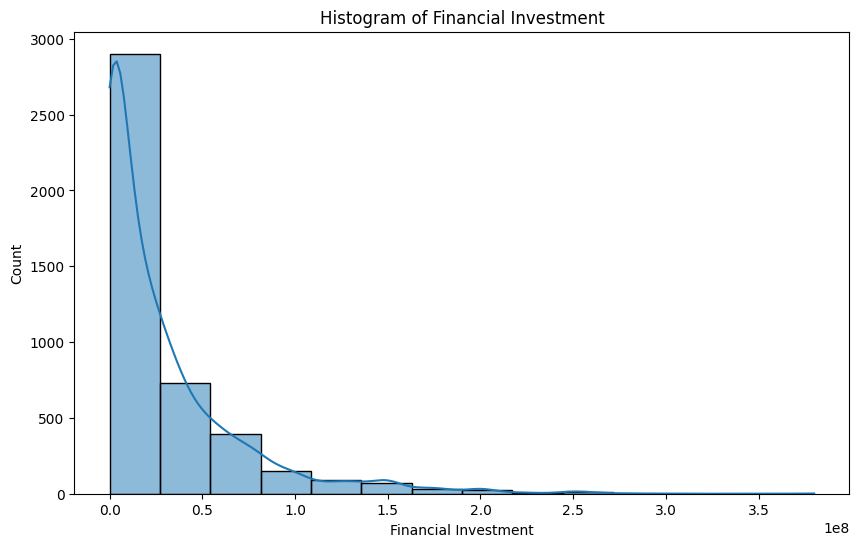

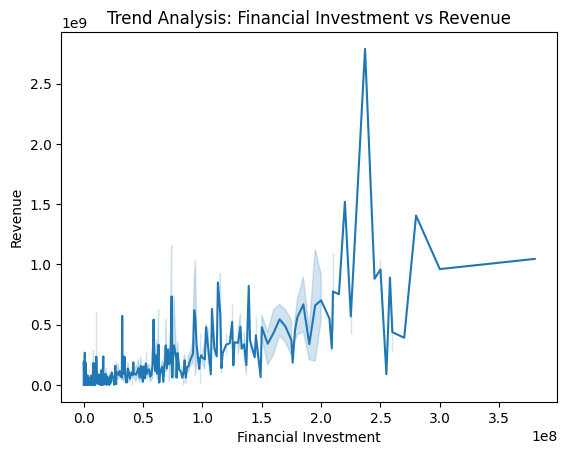

In [58]:
plt.figure(figsize=(10, 6))
sns.histplot(data_combind['financial_investment'], bins=14, kde=True)
plt.title('Histogram of Financial Investment')
plt.xlabel('Financial Investment')
plt.show()

feature = 'financial_investment'
target = 'revenue'
sns.lineplot(x=feature, y=target, data =data_combind)  # Line plot
plt.title('Trend Analysis: Financial Investment vs Revenue')
plt.xlabel('Financial Investment')
plt.ylabel('Revenue')
plt.show()

We can see that most of the data have an financial investment which are extremly small for a film. So we can question ourself if the remaining datas will be enought. Because if we only take the small financial investment then we only test for them and nothing else...

For the trend Analysis, we can see that in general the higher is the financial investment and higher the revenue will be.

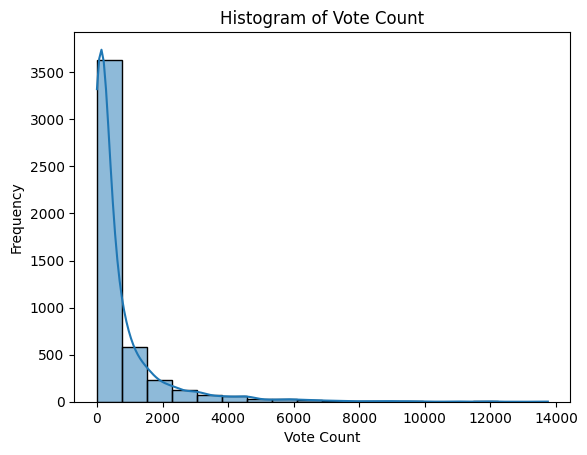

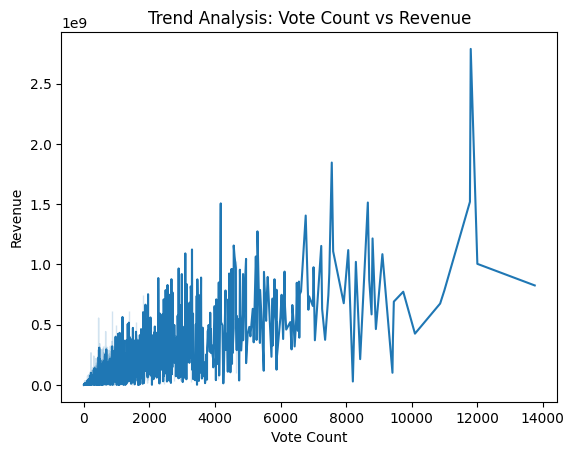

In [59]:
sns.histplot(data_combind['vote_count'], bins=18, kde=True)
plt.title('Histogram of Vote Count')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()
sns.lineplot(x='vote_count', y='revenue', data=data_combind)
plt.title('Trend Analysis: Vote Count vs Revenue')
plt.xlabel('Vote Count')
plt.ylabel('Revenue')
plt.show()

Like for the financial investment, they are a lot of data with low number of vote for the films

We can see that with the vote count increasing it tends in means to increase the revenue.